In [15]:
import pandas as pd

df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [18]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [19]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [20]:
df = pd.get_dummies(df,columns=['Gender','Geography'],drop_first = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Exited'])
y = df['Exited'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()

model.add(Dense(11,activation = 'relu', input_dim=11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1, activation = "relu"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 2s 5ms/step - loss: 1.6041 - accuracy: 0.6913 - val_loss: 1.2479 - val_accuracy: 0.7312
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 1.0726 - accuracy: 0.7383 - val_loss: 0.9762 - val_accuracy: 0.7412
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.9373 - accuracy: 0.7539 - val_loss: 0.8582 - val_accuracy: 0.7481
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.8211 - accuracy: 0.7528 - val_loss: 0.7560 - val_accuracy: 0.7406
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.7514 - accuracy: 0.7558 - val_loss: 0.7182 - val_accuracy: 0.7469
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.7588 - val_loss: 0.6891 - val_accuracy: 0.7500
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.7503 - val_loss: 0.6635 - val_accuracy: 0.7513

In [43]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [37]:
y_pred = y_pred.argmax(axis=-1)

In [42]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

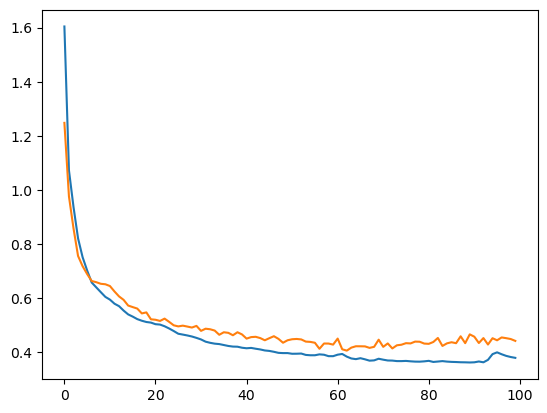

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

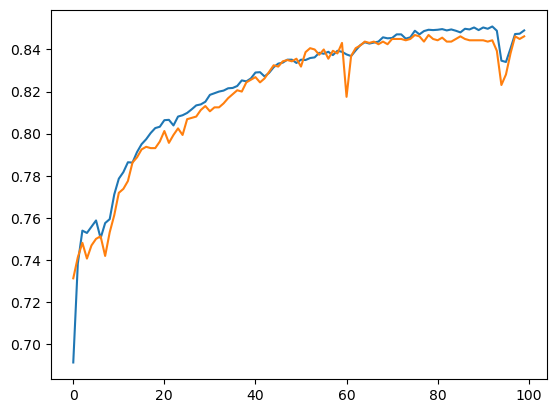

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])